In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
water = pd.read_csv("/content/water_potability.csv")
features = ["Hardness","Solids","Chloramines","Conductivity","Organic_carbon","Turbidity","Potability"]
df = water.loc[:,features].copy()

scaler = MinMaxScaler((0,1))

df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1].copy())
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

kfold = KFold(n_splits=2)

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

histories = []

for train_index, test_index in kfold.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

  model_1 = keras.Sequential([layers.Dense(32,input_shape=[6],activation="relu"),
                             layers.Dense(32,activation="relu"),
                             layers.Dense(1)])
  
  model_1.compile(optimizer="sgd",
                  loss="mae")
  
  history = model_1.fit(X_train, Y_train,
                        validation_data=(X_test,Y_test),
                        batch_size=256,
                        epochs=150)
  histories.append(history)

model_1.summary()

Epoch 1/150
7/7 [==============================] - 0s 28ms/step - loss: 0.4338 - val_loss: 0.3962
Epoch 2/150
7/7 [==============================] - 0s 8ms/step - loss: 0.3959 - val_loss: 0.3968
Epoch 3/150
7/7 [==============================] - 0s 7ms/step - loss: 0.3957 - val_loss: 0.3957
Epoch 4/150
7/7 [==============================] - 0s 9ms/step - loss: 0.3957 - val_loss: 0.3962
Epoch 5/150
7/7 [==============================] - 0s 10ms/step - loss: 0.3956 - val_loss: 0.3954
Epoch 6/150
7/7 [==============================] - 0s 7ms/step - loss: 0.3955 - val_loss: 0.3952
Epoch 7/150
7/7 [==============================] - 0s 7ms/step - loss: 0.3953 - val_loss: 0.3952
Epoch 8/150
7/7 [==============================] - 0s 8ms/step - loss: 0.3952 - val_loss: 0.3950
Epoch 9/150
7/7 [==============================] - 0s 7ms/step - loss: 0.3952 - val_loss: 0.3950
Epoch 10/150
7/7 [==============================] - 0s 9ms/step - loss: 0.3950 - val_loss: 0.3955
Epoch 11/150
7/7 [=========

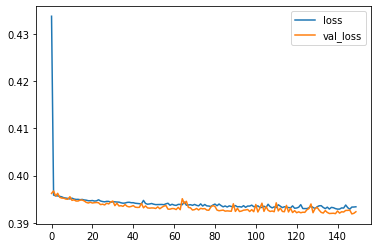

In [10]:
pd.DataFrame(histories[0].history).plot()

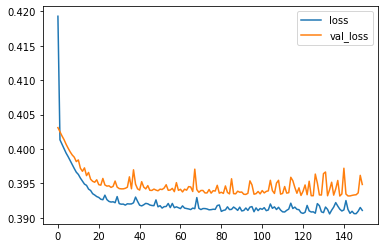

In [11]:
pd.DataFrame(histories[1].history).plot()

In [12]:
histories = []

for train_index, test_index in kfold.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

  model_2 = keras.Sequential([layers.Dense(32,input_shape=[6],activation="relu"),
                             layers.Dense(32,activation="relu"),
                             layers.Dense(1,activation="sigmoid")])
  
  model_2.compile(optimizer="sgd",
                  loss="binary_crossentropy",
                  metrics= ["binary_accuracy"],)
  
  history = model_2.fit(X_train, Y_train,
                        validation_data=(X_test,Y_test),
                        batch_size=256,
                        epochs=150)
  histories.append(history)

model_2.summary()

Epoch 1/150
7/7 [==============================] - 1s 31ms/step - loss: 0.7149 - binary_accuracy: 0.3895 - val_loss: 0.7054 - val_binary_accuracy: 0.4042
Epoch 2/150
7/7 [==============================] - 0s 9ms/step - loss: 0.7042 - binary_accuracy: 0.4090 - val_loss: 0.6959 - val_binary_accuracy: 0.4933
Epoch 3/150
7/7 [==============================] - 0s 8ms/step - loss: 0.6956 - binary_accuracy: 0.4860 - val_loss: 0.6891 - val_binary_accuracy: 0.5470
Epoch 4/150
7/7 [==============================] - 0s 7ms/step - loss: 0.6895 - binary_accuracy: 0.5427 - val_loss: 0.6838 - val_binary_accuracy: 0.5971
Epoch 5/150
7/7 [==============================] - 0s 8ms/step - loss: 0.6847 - binary_accuracy: 0.5989 - val_loss: 0.6795 - val_binary_accuracy: 0.6093
Epoch 6/150
7/7 [==============================] - 0s 10ms/step - loss: 0.6810 - binary_accuracy: 0.6123 - val_loss: 0.6765 - val_binary_accuracy: 0.6117
Epoch 7/150
7/7 [==============================] - 0s 10ms/step - loss: 0.6783 -

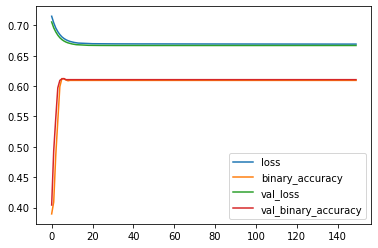

In [13]:
pd.DataFrame(histories[0].history).plot()

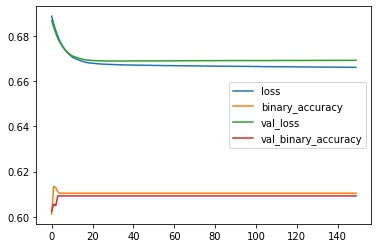

In [14]:
pd.DataFrame(histories[1].history).plot()